In [1]:

import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline


In [2]:
CONSUMER_KEY    = "wuaAS1hvfbJYfGHaMkmEekA6o"
CONSUMER_SECRET = "3OUJE9WyDAQwAvwU2ORfiSTAL2AcvmmZjK1W46r8aarIPoRmgZ"

# Access:
ACCESS_TOKEN  = "587386090-ec0eqYW1QOhzJzNoELj5EZc6WxEzmWsG68nxjZ0B"
ACCESS_SECRET = "mDCGjvXbAvjvnaEXKznDwfZRHrTfZG1VyzhTjwd75tQXh"


In [3]:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api




In [4]:
extractor = twitter_setup()
print(extractor)


tweets = extractor.user_timeline(screen_name  = "@ChelseaFC" , count = 200)

print("Number of tweets extracted: {}.\n".format(len(tweets)))

print("The 5 most recent tweets are : ")
for tweet in tweets[0:5]:
    print(tweet.text)
    print()
    


Number of tweets extracted: 200.

The 5 most recent tweets are : 
An update on Hakim Ziyech... 👀

'It was a special day for me and for all of us. I feel really happy!' 😃

A valuable point on the road for @ChelseaFCW! 👏 https://t.co/oQq5ylAMRg

It’s Man City vs Chelsea in the @BarclaysFAWSL today!

Good luck, @ChelseaFCW! ✊ https://t.co/zySGXllteC

Chelsea Football Club, #ThePrideofLondon. 💙 https://t.co/YNwYjUNmr7



In [6]:
df = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ["Tweets"])
print(df)

                                                Tweets
0                       An update on Hakim Ziyech... 👀
1    'It was a special day for me and for all of us...
2    A valuable point on the road for @ChelseaFCW! ...
3    It’s Man City vs Chelsea in the @BarclaysFAWSL...
4    Chelsea Football Club, #ThePrideofLondon. 💙 ht...
..                                                 ...
195  Stoke drew level ten minutes before the interv...
196  GOAL CHELSEA!\n\nWe're ahead after seven minut...
197  It's an early start for #CFCU18s this morning ...
198  🥶🎮👀 #WinterRefresh time for two of our stars!\...
199  Frank Lampard on Hakim Ziyech earlier today: '...

[200 rows x 1 columns]


In [7]:
print(df[:10])
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)


                                              Tweets
0                     An update on Hakim Ziyech... 👀
1  'It was a special day for me and for all of us...
2  A valuable point on the road for @ChelseaFCW! ...
3  It’s Man City vs Chelsea in the @BarclaysFAWSL...
4  Chelsea Football Club, #ThePrideofLondon. 💙 ht...
5  RT @ChelseaFCW: It's the battle of the Blues t...
6  𝙎𝙖𝙩𝙞𝙨𝙛𝙮𝙞𝙣𝙜 𝙛𝙤𝙤𝙩𝙗𝙖𝙡𝙡 𝙨𝙤𝙪𝙣𝙙𝙨: https://t.co/PUMFj...
7      The boss yesterday! 🙌 https://t.co/CXEIPifFvW
8  Chelsea 2-1 Tottenham \n\nEnjoy! 😉 https://t.c...
9             Morning all! 😘 https://t.co/DHEZ26034m
1231687852074971138
2020-02-23 21:10:42
Twitter for Advertisers
5923
983
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}


In [8]:
df["len"]=  np.array([len(tweet.text) for tweet in tweets])
print(df)


                                                Tweets  len
0                       An update on Hakim Ziyech... 👀   30
1    'It was a special day for me and for all of us...   71
2    A valuable point on the road for @ChelseaFCW! ...   71
3    It’s Man City vs Chelsea in the @BarclaysFAWSL...  104
4    Chelsea Football Club, #ThePrideofLondon. 💙 ht...   67
..                                                 ...  ...
195  Stoke drew level ten minutes before the interv...  126
196  GOAL CHELSEA!\n\nWe're ahead after seven minut...  139
197  It's an early start for #CFCU18s this morning ...  140
198  🥶🎮👀 #WinterRefresh time for two of our stars!\...  140
199  Frank Lampard on Hakim Ziyech earlier today: '...  139

[200 rows x 2 columns]


In [9]:
d = [tweet.id for tweet in tweets]
print(type(d))


<class 'list'>


In [10]:
df["id"] = d
df["ID"] = [tweet.id  for tweet in tweets]
df["_ID_"]  = np.array([tweet.id for tweet in tweets])
print(df)


                                                Tweets  len  \
0                       An update on Hakim Ziyech... 👀   30   
1    'It was a special day for me and for all of us...   71   
2    A valuable point on the road for @ChelseaFCW! ...   71   
3    It’s Man City vs Chelsea in the @BarclaysFAWSL...  104   
4    Chelsea Football Club, #ThePrideofLondon. 💙 ht...   67   
..                                                 ...  ...   
195  Stoke drew level ten minutes before the interv...  126   
196  GOAL CHELSEA!\n\nWe're ahead after seven minut...  139   
197  It's an early start for #CFCU18s this morning ...  140   
198  🥶🎮👀 #WinterRefresh time for two of our stars!\...  140   
199  Frank Lampard on Hakim Ziyech earlier today: '...  139   

                      id                   ID                 _ID_  
0    1231687852074971138  1231687852074971138  1231687852074971138  
1    1231644438482575370  1231644438482575370  1231644438482575370  
2    1231610868955303936  1231610868

In [11]:
print(df["id"][0] ==  df["ID"][0] == df["_ID_"][0] )


True


In [12]:
df["Date"] = [tweet.created_at for tweet in tweets]
df["source"] = [tweet.source for tweet in tweets]
df["Likes"]= [tweet.favorite_count for tweet in tweets]

df["RTs"] = [tweet.retweet_count for tweet in tweets]



In [14]:

df.drop(["_ID_", "id"], axis = 1)

mean = np.mean(df["len"])
print("The length's average mean is ", mean)

fav_max = np.max(df["Likes"])
print(fav_max)



The length's average mean is  87.685
23751


In [15]:
rt_max =np.max(df["RTs"])
print(rt_max)


7139


In [16]:
fav_ = df[df["Likes"] == fav_max]["Tweets"]
print(fav_)


29    BIG three points! 💪\n\n#CHETOT https://t.co/BB...
Name: Tweets, dtype: object


In [17]:
fav = df[df["Likes"] == fav_max].index[0]
print("The tweet which is most liked is {}".format(df["Tweets"][fav]))

print("The most liked tweet has ", fav_max, "likes")

print("The len of the most liked tweet is ", df["len"][fav])



The tweet which is most liked is BIG three points! 💪

#CHETOT https://t.co/BBZyJzPHGK
The most liked tweet has  23751 likes
The len of the most liked tweet is  52


In [18]:
""" RTs"""
rt = df[df["RTs"] == rt_max].index[0]
print("the tweet with the most Retweets is " , df["Tweets"][rt] )
print("The no of retweets the most retweeted tweet has" , rt_max)
print("The length of the most retweeted tweet is " ,df["len"][rt] )



the tweet with the most Retweets is  BIG three points! 💪

#CHETOT https://t.co/BBZyJzPHGK
The no of retweets the most retweeted tweet has 7139
The length of the most retweeted tweet is  52


In [19]:
tlen = pd.Series(df["len"].values,  index = df["Date"])
print(tlen)


Date
2020-02-23 21:10:42     30
2020-02-23 18:18:11     71
2020-02-23 16:04:48     71
2020-02-23 14:04:37    104
2020-02-23 11:01:58     67
                      ... 
2020-02-15 10:51:01    126
2020-02-15 10:11:58    139
2020-02-15 09:36:36    140
2020-02-14 18:47:02    140
2020-02-14 17:01:00    139
Length: 200, dtype: int32


In [20]:
tfav = pd.Series(df["Likes"].values , index =df["Date"])
print(tfav)


Date
2020-02-23 21:10:42     5923
2020-02-23 18:18:11     4589
2020-02-23 16:04:48     2700
2020-02-23 14:04:37     2555
2020-02-23 11:01:58    11790
                       ...  
2020-02-15 10:51:01     1296
2020-02-15 10:11:58     2399
2020-02-15 09:36:36     1861
2020-02-14 18:47:02     7064
2020-02-14 17:01:00    14737
Length: 200, dtype: int64


In [21]:
tretw = pd.Series(df["RTs"].values,  index =df["Date"])
print(tretw)


Date
2020-02-23 21:10:42     983
2020-02-23 18:18:11     349
2020-02-23 16:04:48     158
2020-02-23 14:04:37     157
2020-02-23 11:01:58    1875
                       ... 
2020-02-15 10:51:01      74
2020-02-15 10:11:58     127
2020-02-15 09:36:36     127
2020-02-14 18:47:02     366
2020-02-14 17:01:00    1642
Length: 200, dtype: int64


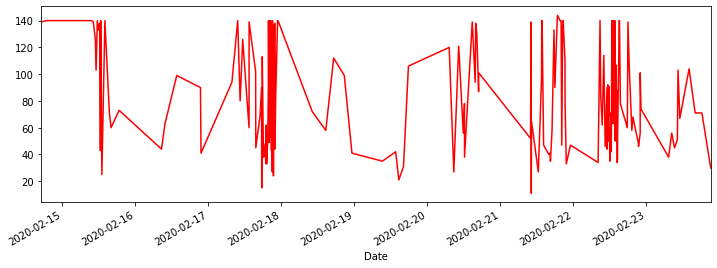

In [22]:
tlen.plot(figsize = (12,4) , color = 'r')


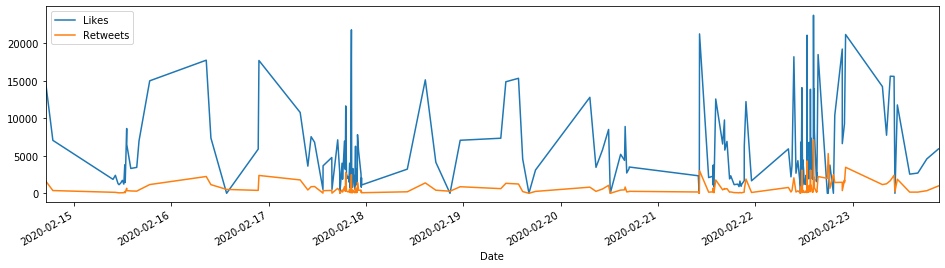

In [23]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tretw.plot(figsize=(16,4), label="Retweets", legend=True)


In [24]:
sources = []
for source in df["source"]:
    if source not in sources:
        sources.append(source)
print(sources)


['Twitter for Advertisers', 'Twitter for iPhone', 'Twitter Media Studio', 'Twitter Web App', 'TweetDeck']


In [25]:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))
    


Creation of content sources:
* Twitter for Advertisers
* Twitter for iPhone
* Twitter Media Studio
* Twitter Web App
* TweetDeck


In [26]:
percent = np.zeros(len(sources))
print(percent)


[0. 0. 0. 0. 0.]


In [30]:
#for source in df["source"]:
 #   print(source)
lisy = []
for x in df["source"]:
    if x not in lisy:
        lisy.append(x)
print(lisy)



['Twitter for Advertisers', 'Twitter for iPhone', 'Twitter Media Studio', 'Twitter Web App', 'TweetDeck']


In [32]:
#for source in df["source"]:
    #print(source)
count = dict(df["source"].value_counts())
print(count)
s = sum(count.values())
percentage =[]
source = []
new =  [a for a in df["source"].value_counts()]
print(new)


{'Twitter Web App': 115, 'Twitter Media Studio': 39, 'Twitter for Advertisers': 28, 'Twitter for iPhone': 17, 'TweetDeck': 1}
[115, 39, 28, 17, 1]


Twitter Web App 57.5
Twitter Media Studio 19.5
Twitter for Advertisers 14.0
Twitter for iPhone 8.5
TweetDeck 0.5


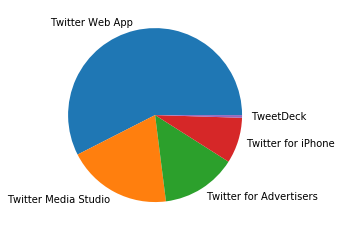

In [33]:
for k, v in count.items():
    pct = v * 100.0 / s
    print(k, pct)
    percentage.append(v)
    source.append(k)
plt.pie(percentage , labels = source)
plt.show()
